In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [303]:
df  = pd.read_pickle('../deliver/NIST_CeramicDataSet.pkl')
df.head()

,chemicalFormula,licenses,names,preparation,references,Axis Length,Axis Length-conditions,Axis Length-units,Bulk Modulus,Bulk Modulus-conditions,...,Thermal Expansion-conditions,Thermal Expansion-units,Thermal Shock Resistance,Thermal Shock Resistance-conditions,Thermal Shock Resistance-units,Weibull Modulus,Weibull Modulus-conditions,Weibull Strength,Weibull Strength-conditions,Weibull Strength-units
1,SiO2,[{'name': 'NIST_SRD-30'}],[Silica],NaN,"[{'citation': 'Gaseous Corrosion of Ceramics, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3Al2O3.2SiO2.xZrO2.yY2O3,[{'name': 'NIST_SRD-30'}],[Mullite composite],[{'name': 'Hot Pressing'}],[{'citation': 'Thermal Diffusivity/Conductivit...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Al2O3,[{'name': 'NIST_SRD-30'}],[Alumina],[{'name': 'Hot Pressing'}],"[{'citation': 'Mechanical Properties of Pure, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Si3N4.xCeO2.ySiC,[{'name': 'NIST_SRD-30'}],[Silicon nitride composite],[{'name': 'Hot Pressing'}],[{'citation': 'Effect of Silicon Carbide Whisk...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Si3N4,[{'name': 'NIST_SRD-30'}],[Silicon nitride],[{'name': 'Hot Isostatic Pressing'}],[{'citation': 'Corrosion of Silicon Nitride Ce...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
#Remove all unit  and condition columns
list_unit_cols = []
for column in df.columns:
    if '-units' in column or '-conditions' in column or '-maximum' in column or '-minimum' in column:
        list_unit_cols.append(column)
 

df = df.drop(list_unit_cols, axis=1)
df.shape

(4098, 59)

In [305]:
# Groups entries by chemical formula and counts the number of entries for each features
df_counts = df.groupby('chemicalFormula', as_index=False).count()
df_counts.head()

,chemicalFormula,licenses,names,preparation,references,Axis Length,Bulk Modulus,Cell Angle,Chemical Family,Commercial Name,...,Sound Velocity,Space Group,Specific Heat,Tensile Strength,Thermal Conductivity,Thermal Diffusivity,Thermal Expansion,Thermal Shock Resistance,Weibull Modulus,Weibull Strength
0,$\alpha$-SiC.x$\beta$-SiC.yAl2O3.zC,3,3,3,3,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,$\beta$-Si3Al3O3N5,6,6,6,6,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
2,(1-x)12C.x13C,2,2,2,2,0,0,0,2,0,...,0,0,0,0,1,1,0,0,0,0
3,(1-x)Al2O3.xAlN,2,2,2,2,1,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
4,(1-x)SiC.xAlN(solidsolution),1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
df_counts.shape

(309, 59)

In [307]:
# Checking how often there is more than one entry for a feature for a given chemical formula
(df_counts > 1).sum().sort_values(ascending=False).head()

chemicalFormula    309
references         253
licenses           253
Chemical Family    253
names              252
dtype: int64

In [308]:
# How many of the 158 features have more than one entry for any given chemical formula?
((df_counts > 1).sum() >0).sum()

53

In [309]:
list(df.columns)

['chemicalFormula',
 'licenses',
 'names',
 'preparation',
 'references',
 'Axis Length',
 'Bulk Modulus',
 'Cell Angle',
 'Chemical Family',
 'Commercial Name',
 'Compressive Strength',
 'Corrosion Activtn Energy',
 'Corrosion Rate',
 'Corrosion Species',
 'Creep Activatn Energy',
 'Creep Rate',
 'Creep Rate Exponent',
 'Crystal Cell System',
 'Crystallinity',
 'Debye Temperature',
 'Density',
 'Diffusion Coefficient',
 'Dopant',
 'Elastic Modulus',
 'Elasticity Tensor',
 'Electrical Resistivity Log',
 'Flexural Strength',
 'Fracture Energy',
 'Fracture Toughness',
 'Friction Coefficient',
 'Grain Size',
 'Grinding Rat',
 'Gruneisen Parameter',
 'Hardness',
 'Impurity',
 'InChI',
 'Log Wear Coefficient',
 'Log Wear Rate',
 'Manufacturer',
 'Maximum-Use Temperature',
 'Melting Point Temperature',
 'Phase',
 'Poissons Ratio',
 'Porosity',
 'Production Form',
 'Relative Atomic Coordinate',
 'SMILES',
 'Shear Modulus',
 'Sintering Aid',
 'Sound Velocity',
 'Space Group',
 'Specific Heat',

In [337]:
# List of columns that contain numerical value and can easily be converted
numerical_cols = ['chemicalFormula','Axis Length','Bulk Modulus','Cell Angle','Compressive Strength','Corrosion Activtn Energy', \
                  'Corrosion Rate','Creep Activatn Energy','Creep Rate','Creep Rate Exponent', \
                  'Debye Temperature','Density','Diffusion Coefficient','Elastic Modulus','Electrical Resistivity Log',\
                  'Flexural Strength','Fracture Energy','Fracture Toughness','Friction Coefficient','Grain Size',\
                  'Grinding Rat','Gruneisen Parameter','Hardness','Log Wear Coefficient','Log Wear Rate',\
                  'Maximum-Use Temperature','Melting Point Temperature','Poissons Ratio','Porosity','Relative Atomic Coordinate',\
                  'Shear Modulus','Sound Velocity','Specific Heat','Tensile Strength','Thermal Conductivity',\
                  'Thermal Diffusivity','Thermal Expansion','Weibull Modulus','Weibull Strength']

non_numerical_cols = ['Chemical Family','Commercial Name','Corrosion Species','Crystal Cell System',\
                      'Dopant','Elasticity Tensor','Impurity','InChI','Manufacturer','Phase','SMILES','Sintering Aid',\
                      'Space Group','Thermal Shock Resistance','licenses','references']

categorical_cols = ['preparation','Crystallinity','Production Form','names']

In [320]:
print(len(numerical_cols),'+',len(non_numerical_cols),'+',len(categorical_cols))

38 + 16 + 5


In [ ]:
# Remove errors given in parentheses from numerical columns
def remove_par_errs(entry_str):
    try:
        entry_str = re.sub('- ', '-', entry_str)
        ret = re.sub( '\((.*?)\)', '', entry_str)
        if entry_str=='-':
            ret=np.nan
    except:
        ret = entry_str
    return ret

# Convert column to float (dropping values that have an error in parentheses)
def conv_to_float(df, column):
    return df[column].transform(remove_par_errs).astype(float)

#conv_to_float(df, 'Axis Length').dropna().head()

In [389]:
df_num = df[numerical_cols]
for column in numerical_cols[1:]:
    df_num[column] = conv_to_float(df, column)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [390]:
df_num = df_num.groupby('chemicalFormula', as_index=False).mean()

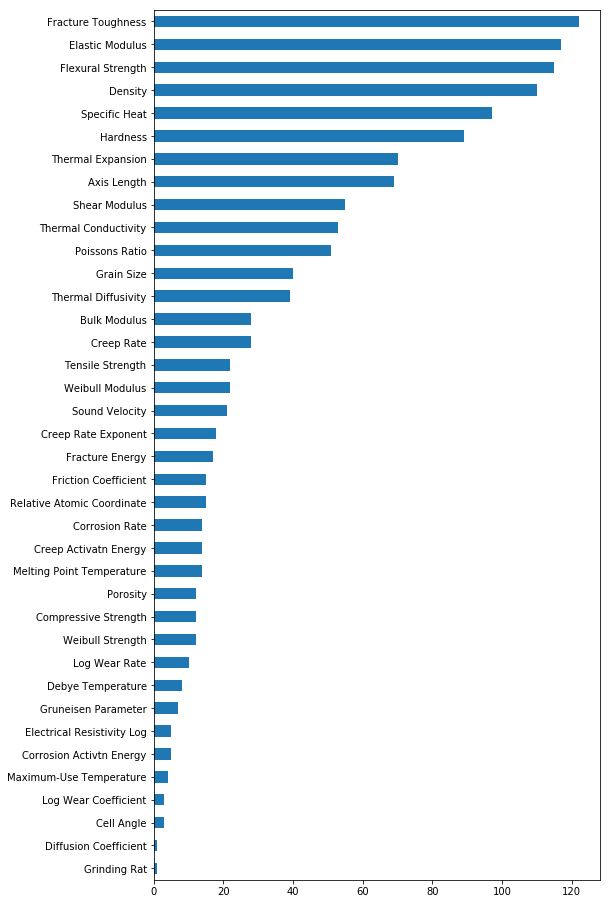

In [381]:
plt.figure(figsize=(8,16))
df_num.count().sort_values().plot.barh()
plt.show()

In [392]:
df_num

,chemicalFormula,Axis Length,Bulk Modulus,Cell Angle,Compressive Strength,Corrosion Activtn Energy,Corrosion Rate,Creep Activatn Energy,Creep Rate,Creep Rate Exponent,...,Relative Atomic Coordinate,Shear Modulus,Sound Velocity,Specific Heat,Tensile Strength,Thermal Conductivity,Thermal Diffusivity,Thermal Expansion,Weibull Modulus,Weibull Strength
0,$\alpha$-SiC.x$\beta$-SiC.yAl2O3.zC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$\beta$-Si3Al3O3N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(1-x)12C.x13C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.000000,18.40000,NaN,NaN,NaN
3,(1-x)Al2O3.xAlN,7.951200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.610000,NaN,NaN
4,(1-x)SiC.xAlN(solidsolution),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,(1-x)SiC.xAlN(two-phase),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,(1-x)ZrO2.xY2O3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,54.200000,NaN,NaN,NaN,NaN,NaN,NaN
7,(1-x-y)Al2O3.xAlN.yTiN,NaN,NaN,NaN,NaN,NaN,1.8000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,(3+x)Al2O3.(2-x)SiO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.5SiO2.(0.5-x)Al2O3.xE2O3,NaN,90.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Make features from categorical data

In [383]:
df[categorical_cols].head()

,preparation,Crystallinity,Production Form,names
1,NaN,Polycrystalline,NaN,[Silica]
2,[{'name': 'Hot Pressing'}],Polycrystalline,NaN,[Mullite composite]
3,[{'name': 'Hot Pressing'}],Polycrystalline,NaN,[Alumina]
4,[{'name': 'Hot Pressing'}],Polycrystalline,NaN,[Silicon nitride composite]
5,[{'name': 'Hot Isostatic Pressing'}],Polycrystalline,NaN,[Silicon nitride]


In [384]:
df['Crystallinity']

1       Polycrystalline
2       Polycrystalline
3       Polycrystalline
4       Polycrystalline
5       Polycrystalline
6       Polycrystalline
7       Polycrystalline
8       Polycrystalline
9       Polycrystalline
10      Polycrystalline
11      Polycrystalline
12      Polycrystalline
13      Polycrystalline
14      Polycrystalline
15      Polycrystalline
16      Polycrystalline
17      Polycrystalline
18      Polycrystalline
19       Single Crystal
20      Polycrystalline
21      Polycrystalline
22      Polycrystalline
23      Polycrystalline
24      Polycrystalline
25      Polycrystalline
26      Polycrystalline
27      Polycrystalline
28      Polycrystalline
29      Polycrystalline
30      Polycrystalline
             ...       
4069    Polycrystalline
4070    Polycrystalline
4071    Polycrystalline
4072    Polycrystalline
4073    Polycrystalline
4074    Polycrystalline
4075    Polycrystalline
4076    Polycrystalline
4077    Polycrystalline
4078    Polycrystalline
4079    Polycrys